<a href="https://colab.research.google.com/github/haseena-hassan/needsMapping/blob/master/CitizenNeedMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from geopy.geocoders import Nominatim

%matplotlib inline

In [0]:
pd.pandas.set_option('display.max_columns', None)
data= pd.read_csv('./CitizenNeeds.csv')


Text(0.5, 0, 'Number of citizens opted')

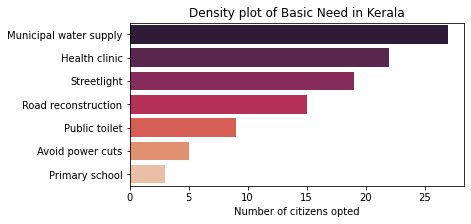

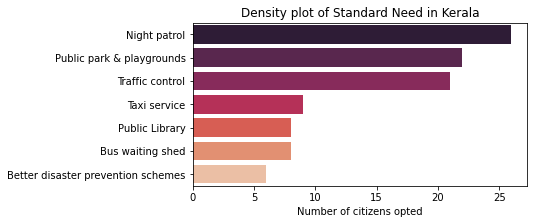

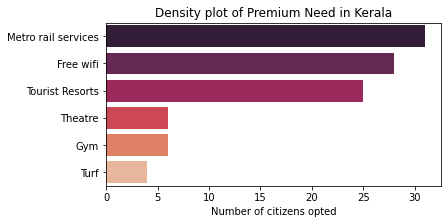

In [0]:
plt.figure(figsize=(6,3))
chains=data['Basic Need'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='rocket')
plt.title("Density plot of Basic Need in Kerala")
plt.xlabel("Number of citizens opted")

plt.figure(figsize=(6,3))
chains=data['Standard Need'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='rocket')
plt.title("Density plot of Standard Need in Kerala")
plt.xlabel("Number of citizens opted")

plt.figure(figsize=(6,3))
chains=data['Premium Need'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='rocket')
plt.title("Density plot of Premium Need in Kerala")
plt.xlabel("Number of citizens opted")

In [0]:
locations=pd.DataFrame({"District":data['District'].unique()})
locations['District']=locations['District'].apply(lambda x: "" + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['District']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

map_data = pd.DataFrame(data['District'].value_counts().reset_index())
map_data.columns=['District','count']
map_data=map_data.merge(locations,on='District',how="left").dropna()
lat,lon=zip(*np.array(map_data['geo_loc']))
map_data['lat'], map_data['lon'] =lat, lon



In [0]:
need, count = [[], [], []], [[], [], []]
districts = data['District']
for i in map_data['District']:
  val = districts.str.contains(i)
  basic = data[val]['Basic Need'].value_counts()
  need[0].append(basic.index[0])
  count[0].append(float(basic[0]))
  standard = data[val]['Standard Need'].value_counts()
  need[1].append(standard.index[0])
  count[1].append(float(standard[0]))
  premium = data[val]['Premium Need'].value_counts()
  need[2].append(premium.index[0])
  count[2].append(float(premium[0]))

map_data['basic'] = need[0]
map_data['std'] = need[1]
map_data['prm'] = need[2]
map_data['count_basic'] = count[0]
map_data['count_std'] = count[1]
map_data['count_prm'] = count[2]


In [0]:
map_data = pd.DataFrame(data['District'].value_counts().reset_index())
map_data.columns=['District','count']
districts = data['District']
n = {}
k = {}
m = {}
for i in map_data['District']:
  val = districts.str.contains(i)
  n = data[val]['Basic Need'].value_counts()
  k['basic'] = n
  n = data[val]['Standard Need'].value_counts()
  k['Standard'] = n
  n = data[val]['Premium Need'].value_counts()
  k['Premium'] = n
  m[i] = k

m

# this is for creating pie chart for analysis different type of each need distribution per districts

{'Ernakulam': {'Premium': Free wifi              8
  Tourist Resorts        3
  Metro rail services    2
  Theatre                1
  Gym                    1
  Turf                   1
  Name: Premium Need, dtype: int64,
  'Standard': Traffic control                       5
  Public park & playgrounds             4
  Public Library                        3
  Night patrol                          2
  Better disaster prevention schemes    1
  Taxi service                          1
  Name: Standard Need, dtype: int64,
  'basic': Road reconstruction       4
  Health clinic             3
  Avoid power cuts          3
  Streetlight               3
  Municipal water supply    2
  Public toilet             1
  Name: Basic Need, dtype: int64},
 'Kozhikode': {'Premium': Free wifi              8
  Tourist Resorts        3
  Metro rail services    2
  Theatre                1
  Gym                    1
  Turf                   1
  Name: Premium Need, dtype: int64,
  'Standard': Traffic control  

In [0]:
m = folium.Map(location=[10.8505, 76.2711], tiles="OpenStreetMap", zoom_start=6)
for i in range(0,len(map_data)):
   folium.Circle(
      location=[map_data.iloc[i]['lat'], map_data.iloc[i]['lon']],
      popup=map_data.iloc[i]['District'] + ' :\n' + map_data.iloc[i]['basic'],
      radius=map_data.iloc[i]['count_basic']*1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
   folium.Circle(
      location=[map_data.iloc[i]['lat']+0.2, map_data.iloc[i]['lon']+0.2],
      popup=map_data.iloc[i]['District'] + ' :\n' + map_data.iloc[i]['std'],
      radius=map_data.iloc[i]['count_std']*500,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)
   folium.Circle(
      location=[map_data.iloc[i]['lat'], map_data.iloc[i]['lon']+0.2],
      popup=map_data.iloc[i]['District'] + ' :\n' + map_data.iloc[i]['prm'],
      radius=map_data.iloc[i]['count_prm']*300,
      color='green',
      fill=True,
      fill_color='green'
   ).add_to(m)
m.save('mymap.html')
m